# Getting Real Estate Prices

# Introduction
You are given a dataset that contains the prices of real estate properties. 
The dataset contains 8 columns that describe different aspects of the properties. Your task is to create a linar regression model that can predict the price of a property based on its characteristics.

## Task 1: Data Exploration
Load the data and check out which columns exist in the dataset.
- Which of them do you think are relevant for the prediction of the price?
- What would be your dependent and independent variables?
- Explore the summary statistics of the columns. 
- Follow the method described in the lecture for data exploration. (pairwise scatter plots, look for any kind of linear relationship.)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Hint: to make your life easier, you can use `seaborn' library for the scatter plots. there is a function called 'pairplot' that can help you with this task.

In [2]:
import pandas as pd
df = pd.read_csv('./Real_estate.csv')

In [6]:
print(df.shape)
df.head() 


(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Answer: we have 6 independent variables and one dependent variable 

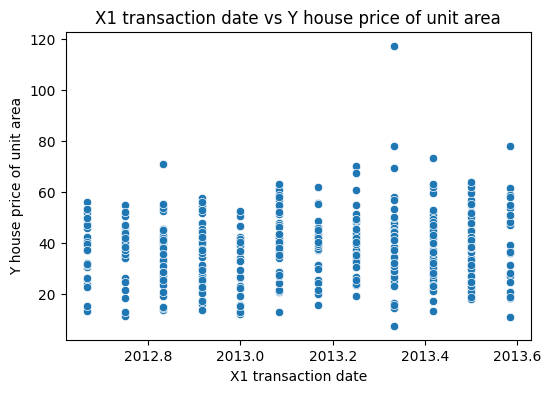

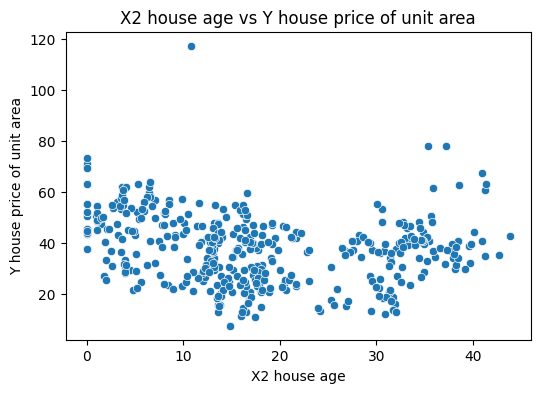

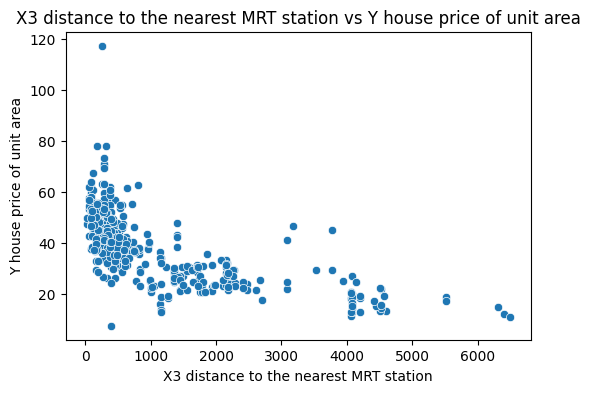

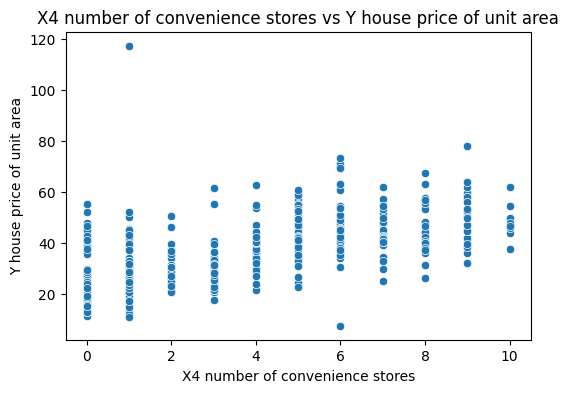

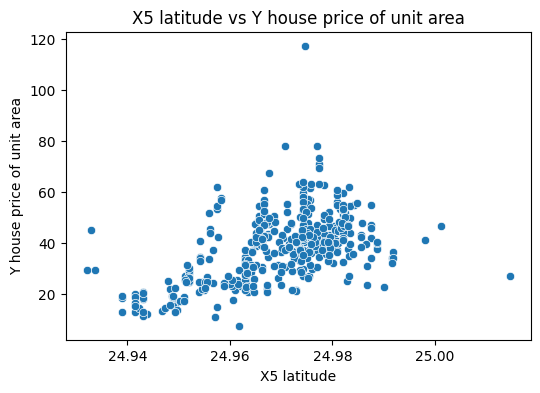

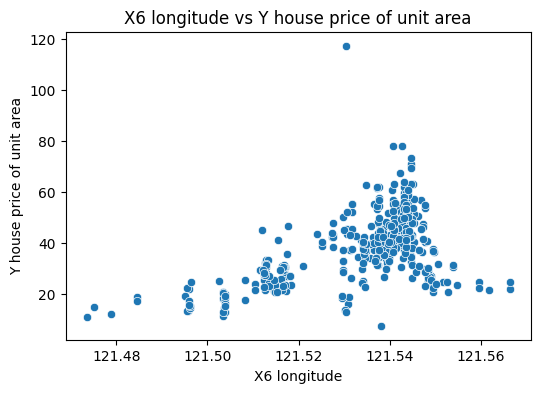

In [12]:
import seaborn as sns
target_variable = df.columns[-1]
for col in df.columns[1:-1]:  
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df[target_variable])
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.title(f"{col} vs {target_variable}")
    plt.show()

from the graphs we see that MRT distance, longitude and latitude have strong linear relationship with the dependent variable. Number of convinience stores may have a weak relationship to it. Other independent variables have almost none. We will double check it with the correlation function. 

In [14]:
correlation_matrix = df.corr()
correlations = correlation_matrix[[target_variable]]
print(correlations)

                                        Y house price of unit area
No                                                       -0.028587
X1 transaction date                                       0.087491
X2 house age                                             -0.210567
X3 distance to the nearest MRT station                   -0.673613
X4 number of convenience stores                           0.571005
X5 latitude                                               0.546307
X6 longitude                                              0.523287
Y house price of unit area                                1.000000


as expected, we will use distance to the MRT, convenience stores number, latitude and longitude for the linear model training. 

## Task 2: Building a linear regression model
- Split the data into training and testing sets. (we did so last time using the train_test_split function from `sklearn`)
- Train a linear regression model using the training set. (Use `sklearn.linear_model.LinearRegression`)
- make yourself familiar with the functions of the linear regression model. (`.fit()`, `.predict()`, `.score()`)
## Task 2.1: Create a linear regression model with only one independent variable (try several ones)
## Task 2.2: Create a linear regression model with multiple independent variables 
- compare the results in model evaluation

In [16]:
from sklearn.model_selection import train_test_split
strong_features = correlations[abs(correlations[target_variable]) > 0.5].index.tolist()
print(strong_features)
strong_features.remove(target_variable)
print(strong_features)

['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']
['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


In [20]:
X = df[strong_features]
y = df[target_variable]
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

#training models for each independent variable separately
#MRT 
X_train_mrt = X_train_full.iloc[:, [0]]
X_test_mrt = X_test_full.iloc[:, [0]]

model_mrt = LinearRegression()
model_mrt.fit(X_train_mrt, y_train)

print("Model for MRT_distance trained.")

#convenience stores 
X_train_stores = X_train_full.iloc[:, [1]]
X_test_stores = X_test_full.iloc[:, [1]]

model_stores = LinearRegression()
model_stores.fit(X_train_stores, y_train)

print("Model for convenience stores trained.")

#Latitude
X_train_lat = X_train_full.iloc[:, [2]]
X_test_lat = X_test_full.iloc[:, [2]]

model_lat = LinearRegression()
model_lat.fit(X_train_lat, y_train)
print("Model for Latitude trained.")

#longitude
X_train_long = X_train_full.iloc[:, [3]]
X_test_long = X_test_full.iloc[:, [3]]

model_long = LinearRegression()
model_long.fit(X_train_long, y_train)

print("Model for Longitude trained.")




Model for MRT_distance trained.
Model for convenience stores trained.
Model for Latitude trained.
Model for Longitude trained.


In [24]:
#training multiple regression 

multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train_full, y_train)
print("Multiple Linear Regression Model Trained!")

Multiple Linear Regression Model Trained!


## Task 3: Model Evaluation
- Evaluate the model using the testing set.
- Calculate the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.
- Calculate the R-squared value.
The following links can help you: 
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Evaluation for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print()
    
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}


y_pred_mrt = model_mrt.predict(X_test_mrt)
mrt_results = evaluate_model(y_test, y_pred_mrt, model_name="Simple Linear Regression (MRT)")


y_pred_stores = model_stores.predict(X_test_stores)
stores_results = evaluate_model(y_test, y_pred_stores, model_name="Simple Linear Regression (stores)")

y_pred_lat = model_lat.predict(X_test_lat)
lat_results = evaluate_model(y_test, y_pred_lat, model_name="Simple Linear Regression (latitude)")

y_pred_long = model_long.predict(X_test_long)
long_results = evaluate_model(y_test, y_pred_long, model_name="Simple Linear Regression (longitude)")

y_pred_multi = multi_reg_model.predict(X_test_full)
multi_results = evaluate_model(y_test, y_pred_multi, model_name="Multiple linear regression")




Evaluation for Simple Linear Regression (MRT):
Mean Absolute Error (MAE): 6.9210
Mean Squared Error (MSE): 77.3440
Root Mean Squared Error (RMSE): 8.7945
R² Score: 0.5390

Evaluation for Simple Linear Regression (stores):
Mean Absolute Error (MAE): 8.3455
Mean Squared Error (MSE): 101.7384
Root Mean Squared Error (RMSE): 10.0865
R² Score: 0.3935

Evaluation for Simple Linear Regression (latitude):
Mean Absolute Error (MAE): 8.4765
Mean Squared Error (MSE): 108.1643
Root Mean Squared Error (RMSE): 10.4002
R² Score: 0.3552

Evaluation for Simple Linear Regression (longitude):
Mean Absolute Error (MAE): 7.6455
Mean Squared Error (MSE): 103.2244
Root Mean Squared Error (RMSE): 10.1599
R² Score: 0.3847

Evaluation for Multiple linear regression:
Mean Absolute Error (MAE): 6.2436
Mean Squared Error (MSE): 63.9049
Root Mean Squared Error (RMSE): 7.9941
R² Score: 0.6191



Explanation of the results
The lower MAE, MSE, RMSE the better the model. R^2 closer to "1" the better the model. 

Simple linear regression: 
Prediction based on the MRT showed the best results. Highest R^2 explains 53,9% of the actual values 

Multiple linear regression worked the best for this dataset showing the higher metrics as any simple linear regression model used in this exercise 


For fun I decide to test if the model training with all the available features improves the metrics results 

In [29]:
df = pd.read_csv('./Real_estate.csv')
df = df.iloc[:, 1:]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)

y_pred = multi_reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Multiple Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 5.3054
Mean Squared Error (MSE): 53.5056
Root Mean Squared Error (RMSE): 7.3148
R² Score: 0.6811


Based on the evaluated metrics, when we used all the available features, the model performance improved. This can be explained by feature interactions, more features improve variance explanation. This is not always the case since those features could have added noise, but it did not happen here. 
There can be further improvements to the prediction. We could combine longitude and latitude into one feature, apply a polynomial regression to see if the relationships between the variables add information etc. 

## Task 4: Plot the regression lines on the test data
- Use the `matplotlib` library to plot the regression lines on the test data.
- You can choose any two variables for the plot.
- you can find out how to do this here: https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html

plotting MRT model

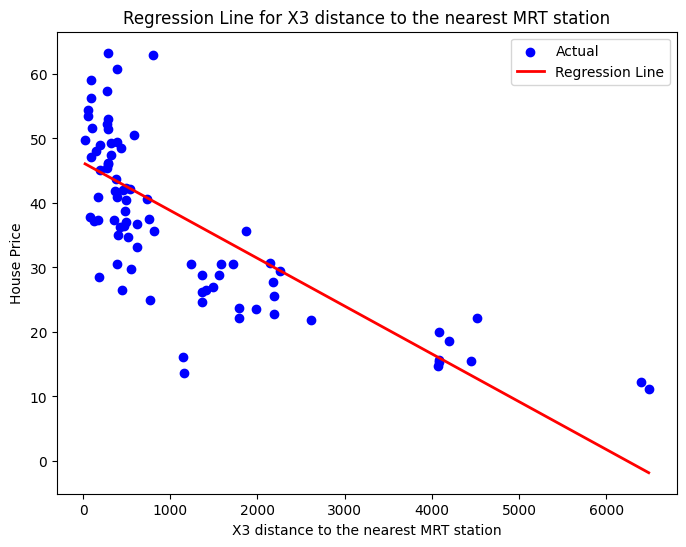

In [38]:

sorted_indices = np.argsort(X_test_mrt.values.flatten())
X_sorted = X_test_mrt.iloc[sorted_indices]  
y_sorted = y_pred_mrt[sorted_indices] 


plt.figure(figsize=(8,6))
plt.scatter(X_test_mrt, y_test, color="blue", label="Actual")


plt.plot(X_sorted, y_sorted, color="red", linewidth=2, label="Regression Line")


plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("House Price")
plt.title("Regression Line for X3 distance to the nearest MRT station")
plt.legend()
plt.show()